# Predict Breast Cancer

Based on the data collected in the University of Wisconsin

## Import basic libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Load and explore the dataset

In [2]:
df = pd.read_csv("./dataset/breast-cancer-wisconsin.data", 
                 names=["id", "clump_thickness", "cell_size_unif", "cell_shape_unif", 
                        "marginal_adhesion", "epith_cell_size", "bare_nuclei", "bland_chromatin", 
                        "normal_nucleoli", "mitoses", "class"])

We don't need ID column

In [3]:
del df['id']

In [4]:
df.shape

(699, 10)

In [5]:
df.head(5)

,clump_thickness,cell_size_unif,cell_shape_unif,marginal_adhesion,epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [6]:
df.tail(5)

,clump_thickness,cell_size_unif,cell_shape_unif,marginal_adhesion,epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


### Definition of features

| Feature  | Description | Comments |
|--------------|-------------|--------|
| clump_thickness | Clump Thickness | 1 - 10 |
| cell_size_unif | Uniformity of Cell Size | 1 - 10 |
| cell_shape_unif | Uniformity of Cell Shape | 1 - 10 |
| marginal_adhesion | Marginal Adhesion | 1 - 10 |
| epith_cell_size | Single Epithelial Cell Size | 1 - 10 |
| bare_nuclei | Bare Nuclei | 1 - 10 |
| bland_chromatin | Bland Chromatin | 1 - 10 |
| normal_nucleoli | Normal Nucleoli | 1 - 10 |
| mitoses | Mitoses | 1 - 10 |
| class | Class: | (2 for benign, 4 for malignant) |

## Check for correlated features

Correlated features don't add any information, since they are expressing the same data in different ways.
Even worse, they can amplify bias.

In [7]:
def plot_correlation(df, size = 12):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

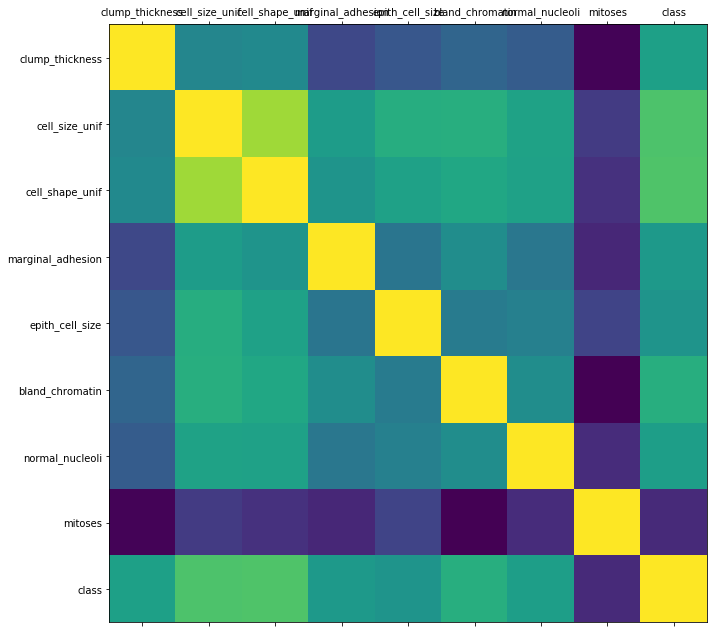

In [8]:
plot_correlation(df, 11)

Looks like "Uniformity of Cell Size" and "Uniformity of Cell Shape" are rather correlated. We'll drop the "Uniformity of cell size"

In [9]:
del df['cell_size_unif']

In [10]:
df.head(5)

,clump_thickness,cell_shape_unif,marginal_adhesion,epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,2,1,3,1,1,2
1,5,4,5,7,10,3,2,1,2
2,3,1,1,2,2,3,1,1,2
3,6,8,1,3,4,3,7,1,2
4,4,1,3,2,1,3,1,1,2


Re-check correlation

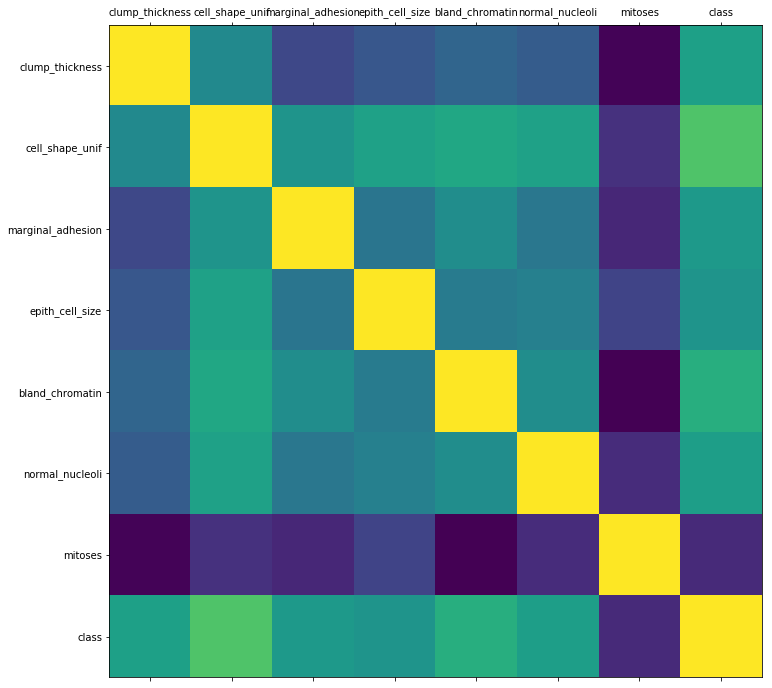

In [11]:
plot_correlation(df)

The correlations look good.  There appear to be no coorelated columns.

## Mold Data

Change class value to 0 for benign, 1 for malign

In [12]:
class_map = {2 : 0, 4 : 1}
df['class'] = df['class'].map(class_map)

In [13]:
df.head(5)

,clump_thickness,cell_shape_unif,marginal_adhesion,epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,2,1,3,1,1,0
1,5,4,5,7,10,3,2,1,0
2,3,1,1,2,2,3,1,1,0
3,6,8,1,3,4,3,7,1,0
4,4,1,3,2,1,3,1,1,0


In [14]:
df.tail(5)

,clump_thickness,cell_shape_unif,marginal_adhesion,epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
694,3,1,1,3,2,1,1,1,0
695,2,1,1,2,1,1,1,1,0
696,5,10,3,7,3,8,10,2,1
697,4,6,4,3,4,10,6,1,1
698,4,8,5,4,5,10,4,1,1


### Check that all the data is numeric

In [15]:
df.applymap(lambda x: isinstance(x, (int, float))).head(5)

,clump_thickness,cell_shape_unif,marginal_adhesion,epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,True,True,True,True,False,True,True,True,True
1,True,True,True,True,False,True,True,True,True
2,True,True,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True,True,True
4,True,True,True,True,False,True,True,True,True


"bare_nuclei" colums has some strings ('?'), convert then to NaN

In [16]:
df['bare_nuclei'] = pd.to_numeric(df.bare_nuclei, errors='coerce', downcast='unsigned')

In [17]:
df.head(5)

,clump_thickness,cell_shape_unif,marginal_adhesion,epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,2,1.0,3,1,1,0
1,5,4,5,7,10.0,3,2,1,0
2,3,1,1,2,2.0,3,1,1,0
3,6,8,1,3,4.0,3,7,1,0
4,4,1,3,2,1.0,3,1,1,0


In [18]:
df.applymap(lambda x: isinstance(x, (int, float))).head(5)

,clump_thickness,cell_shape_unif,marginal_adhesion,epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True


## Verify class distribution

In [19]:
num_obs = len(df)

num_benign = len(df.loc[df['class'] == 0])
num_malign = len(df.loc[df['class'] == 1])

print("Number of benign cases: {0} ({1:2.2f}%)".format(num_benign, (num_benign / num_obs) * 100))
print("Number of malign cases: {0} ({1:2.2f}%)".format(num_malign, (num_malign / num_obs) * 100))

Number of benign cases: 458 (65.52%)
Number of malign cases: 241 (34.48%)


## Visualise the data

Class by mitoses and clump thickness

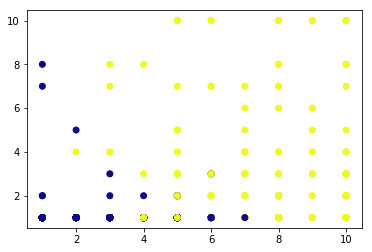

In [20]:
x = df.clump_thickness
y = df.mitoses

color = df['class']

plt.scatter(x, y, c = color, cmap='plasma')
plt.show()

## Split the data into training and testing set

70% for training, 30% for testing

In [21]:
from sklearn.model_selection import train_test_split

feature_column_names = ['clump_thickness', 'cell_shape_unif', 'marginal_adhesion', 
                        'epith_cell_size', 'bare_nuclei', 'bland_chromatin', 
                        'normal_nucleoli', 'mitoses']
predicted_class_column_names = ['class']

X = df[feature_column_names].values
y = df[predicted_class_column_names].values

# 70% for training, 30% for testing
split_test_size = 0.30

# Random seed, to make the results always the same regardless of how many times we run this sheet
random_seed = 17

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=random_seed)

### Verify the split

In [22]:
print("{0:0.2f}% in training set".format((len(X_train) / len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test) / len(df.index)) * 100))

69.96% in training set
30.04% in test set


### Verify that predicted value was split correctly

In [23]:
print("Original benign: {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 0]), (len(df.loc[df['class'] == 0]) / len(df.index)) * 100.0))
print("Original malign: {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 1]), (len(df.loc[df['class'] == 1]) / len(df.index)) * 100.0))
print("")
print("Training benign: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100.0)))
print("Training malign: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100.0)))
print("")
print("Test benign: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100.0)))
print("Test malign: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100.0)))

Original benign: 458 (65.52%)
Original malign: 241 (34.48%)

Training benign: 317 (64.83%)
Training malign: 172 (35.17%)

Test benign: 141 (67.14%)
Test malign: 69 (32.86%)


## Check for null values

In [24]:
df.isnull().values.any()

True

In [25]:
X_test[0:50, 4]

array([ 1.,  1.,  1.,  1., 10.,  1.,  5.,  1.,  2.,  8.,  1., 10., 10.,
        1., 10., 10.,  1.,  1.,  1., 10., 10.,  9.,  1., 10.,  1.,  1.,
        8., 10.,  1.,  1.,  1., 10.,  3.,  8.,  1.,  1.,  2.,  1.,  1.,
        1.,  1.,  2., 10.,  2., nan, 10.,  1.,  9., nan,  5.])

## Impute with the mean

In [26]:
import numpy as np
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [27]:
X_test[0:50, 4]

array([ 1.        ,  1.        ,  1.        ,  1.        , 10.        ,
        1.        ,  5.        ,  1.        ,  2.        ,  8.        ,
        1.        , 10.        , 10.        ,  1.        , 10.        ,
       10.        ,  1.        ,  1.        ,  1.        , 10.        ,
       10.        ,  9.        ,  1.        , 10.        ,  1.        ,
        1.        ,  8.        , 10.        ,  1.        ,  1.        ,
        1.        , 10.        ,  3.        ,  8.        ,  1.        ,
        1.        ,  2.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  2.        , 10.        ,  2.        ,  3.49275362,
       10.        ,  1.        ,  9.        ,  3.49275362,  5.        ])

## Train the model

### Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

#### Performance on training data

In [29]:
from sklearn import metrics

nb_predict_train = nb_model.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.9571


#### Performance on testing data

In [30]:
from sklearn import metrics

nb_predict_test = nb_model.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.9667


#### Metrics

In [32]:
print("Confusion matrix\n")
print("{0}\n".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[0, 1])))

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[0, 1]))

Confusion matrix

[[137   4]
 [  3  66]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       141
           1       0.94      0.96      0.95        69

   micro avg       0.97      0.97      0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



#### Visualize

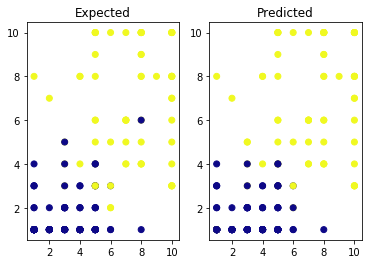

In [33]:
ax = plt.subplot(1, 2, 1)
ax.set_title("Expected")
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test[:, 0], cmap='plasma')

ax = plt.subplot(1, 2, 2)
ax.set_title("Predicted")
predicted = nb_model.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c = predicted, cmap='plasma')

plt.show()